In [1]:
import scipy.stats as sc

In [2]:
import pandas as pd
import numpy as np

In [486]:
pd.set_option("display.max_rows",100)

In [3]:
import pymc3

In [345]:
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
import pymc3 as pm

In [210]:
import arviz as az

In [305]:
import matplotlib.pylab as plt

In [360]:
import patsy

In [362]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
x = np.arange(0,50)
y = sc.distributions.norm(162+3*(x-x.mean()),2)

In [182]:
x = np.arange(0,50)
slope=2.4
intercept=160
y = sc.distributions.norm(intercept+slope*(x-x.mean()),2)
target_x = []
target_y = []
for i in range(100):
    target_x.append(x)
    target_y.append(y.rvs(len(x)))
y=np.reshape(target_y,(5000,))
x=np.reshape(target_x,(5000,))

In [282]:
with pm.Model() as Model:
    beta = pm.Normal("beta",mu=0,sigma=5)
    alpha = pm.Normal('alpha',mu=150,sigma=20)
    mu = pm.Deterministic('mu',alpha + beta*(x-x.mean()))
    sigma=pm.Lognormal("sigma",mu=0,sigma=5)
    y_tmp = pm.Normal("yvar",mu=mu,sigma=sigma,observed=y)
    

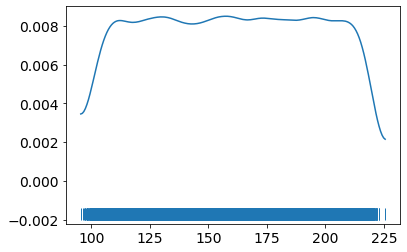

In [283]:
az.plot_kde(y, rug=True)

In [317]:
with Model:
    trace = pm.sample(100,tune=1000)

Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]
Sampling 4 chains, 0 divergences: 100%|██████████| 4400/4400 [00:03<00:00, 1327.18draws/s]


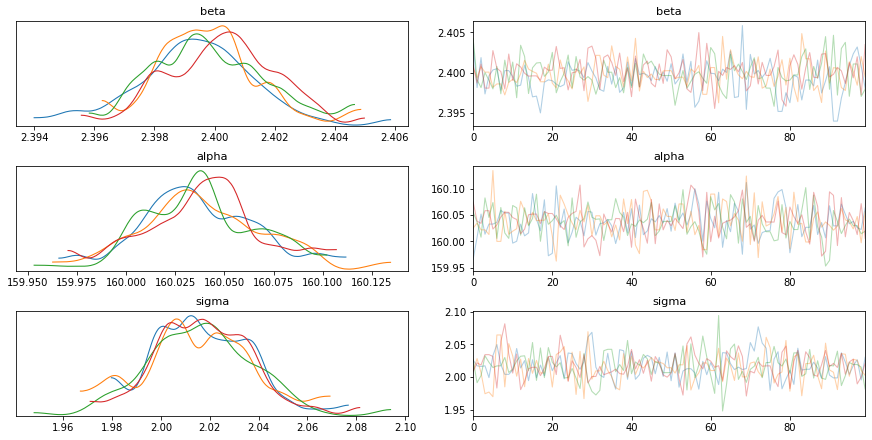

In [318]:
N=500
trace_n = trace[:N]
az.plot_trace(trace_n,var_names='~mu');

In [319]:
az.summary(trace_n,var_names='~mu')

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta,2.400,0.002,2.396,2.403,0.000,0.000,444.0,444.0,465.0,298.0,1.01
alpha,160.038,0.031,159.984,160.098,0.001,0.001,594.0,594.0,580.0,312.0,1.00
sigma,2.017,0.021,1.978,2.056,0.001,0.001,528.0,527.0,535.0,264.0,1.00


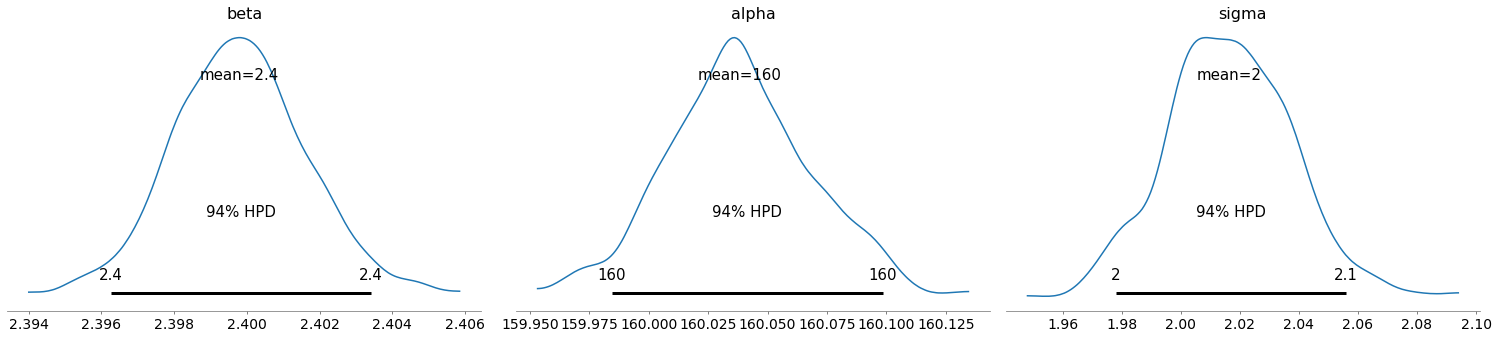

In [320]:
az.plot_posterior(trace_n,var_names='~mu');

In [321]:
trace_df = pm.trace_to_dataframe(trace_n)

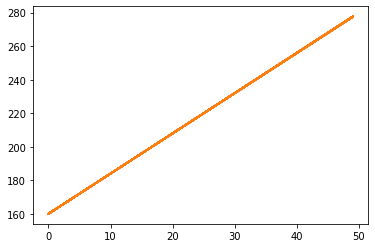

In [322]:
for _ in range(0, 200):
    idx = np.random.randint(len(trace_n))
    plt.plot(x[:N], trace_n['alpha'][idx] + trace_n['beta'][idx] * x[:N], 'C1-', alpha=0.5)
# plt.xlabel(d2.columns[1])
# plt.ylabel(d2.columns[0]);

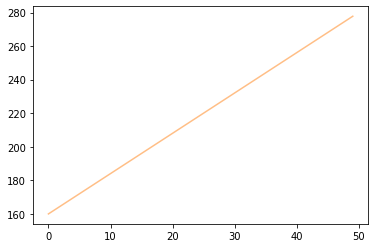

In [323]:
plt.plot(x[:N], trace_n['alpha'][1] + trace_n['beta'][0] * x[:N], 'C1-', alpha=0.5)

In [327]:
df_trace_N = pm.trace_to_dataframe(trace_n).filter(regex=('mu.*'))
df_trace_N.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__4990,mu__4991,mu__4992,mu__4993,mu__4994,mu__4995,mu__4996,mu__4997,mu__4998,mu__4999
0,101.078247,103.481820,105.885393,108.288966,110.692538,113.096111,115.499684,117.903257,120.306829,122.710402,...,197.221157,199.624730,202.028303,204.431876,206.835448,209.239021,211.642594,214.046167,216.449739,218.853312
1,101.252998,103.651158,106.049318,108.447478,110.845638,113.243798,115.641958,118.040118,120.438277,122.836437,...,197.179394,199.577554,201.975713,204.373873,206.772033,209.170193,211.568353,213.966513,216.364673,218.762833
2,101.205867,103.607746,106.009624,108.411503,110.813382,113.215260,115.617139,118.019018,120.420896,122.822775,...,197.281014,199.682893,202.084772,204.486650,206.888529,209.290408,211.692287,214.094165,216.496044,218.897923
3,101.278068,103.675440,106.072811,108.470182,110.867554,113.264925,115.662297,118.059668,120.457039,122.854411,...,197.172924,199.570295,201.967666,204.365038,206.762409,209.159781,211.557152,213.954523,216.351895,218.749266
4,101.242530,103.642138,106.041747,108.441355,110.840964,113.240573,115.640181,118.039790,120.439398,122.839007,...,197.226872,199.626481,202.026089,204.425698,206.825307,209.224915,211.624524,214.024132,216.423741,218.823349


In [334]:
mu_50 = trace_n['alpha'] +trace_n['beta']*(50)

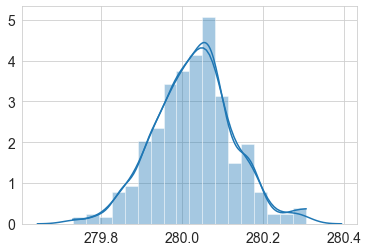

In [348]:
sns.distplot(mu_50)

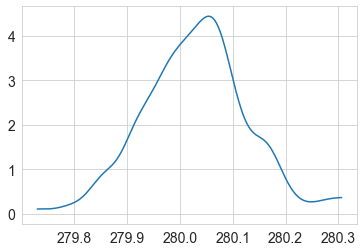

In [347]:
az.plot_kde(mu_50)

In [329]:
weight_seq = np.arange(25, 71)
# Given that we have a lot of samples we can use less of them for plotting (or we can use all!)
chain_N_thinned = trace_n[::10]
mu_pred = np.zeros((len(weight_seq), len(chain_N_thinned)*trace_n.nchains))
for i, w in enumerate(weight_seq):
    mu_pred[i] = chain_N_thinned['alpha'] + chain_N_thinned['beta'] * w

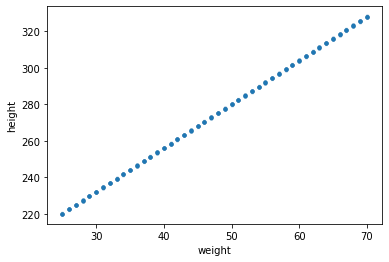

In [333]:
plt.plot(weight_seq, mu_pred, 'C0.', alpha=0.1)
plt.xlabel('weight')
plt.ylabel('height');


In [352]:
cherry = pd.read_csv("./data/cherry_blossoms.csv",sep=';')

In [355]:
cherry = cherry[~cherry.temp.isna()]

In [356]:
cherry.head()

,year,doy,temp,temp_upper,temp_lower
38,839,NaN,5.87,10.99,0.75
39,840,NaN,5.99,10.78,1.21
40,841,NaN,6.12,10.60,1.64
41,842,NaN,6.25,10.47,2.02
42,843,NaN,6.37,10.39,2.35


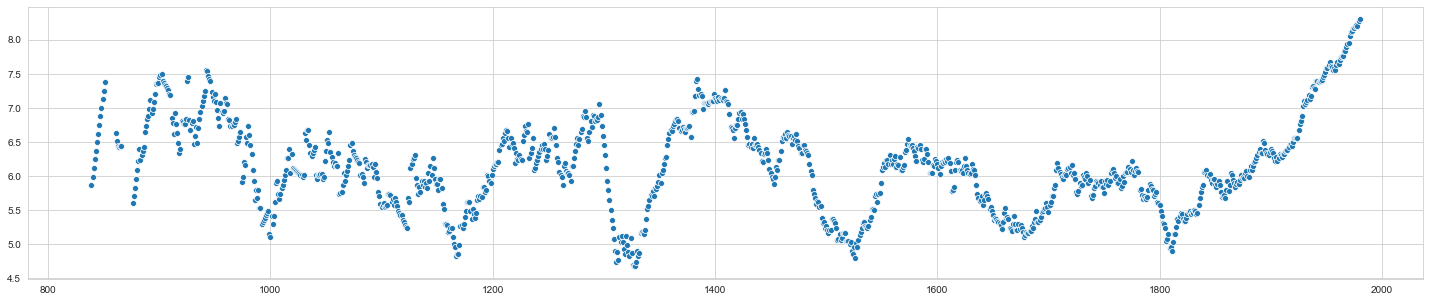

In [539]:
plt.figure(figsize=(25,5))
sns.scatterplot(cherry.year.values,cherry.temp.values)

In [548]:
num_knots = 10
knot_list = np.quantile(cherry.year, q=np.linspace(0,1, num=num_knots))
print(knot_list)

[ 839.          981.77777778 1106.55555556 1231.33333333 1356.11111111
 1480.88888889 1605.66666667 1730.44444444 1855.22222222 1980.        ]


In [549]:
B = patsy.dmatrix("bs(year, knots=knots, degree=3, include_intercept=True)",
                   data={'year': cherry.year.values,
                         'knots': knot_list[1:-1]})

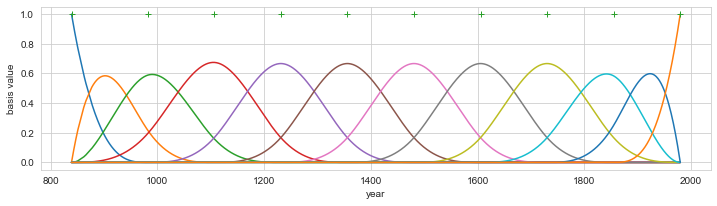

In [550]:
plt.figure(figsize=(12,3))
for i in range(1, B.shape[1]):
    plt.plot(cherry.year, B[:, i])
plt.plot(knot_list, [1 for x in knot_list], '+')
plt.xlabel('year')
plt.ylabel('basis value')
plt.show()

In [398]:
## very slow implementation
np.random.seed(123)
with pm.Model() as m4_7:
    a = pm.Normal('a', 6, 10)
    w = pm.MvNormal('w', mu=np.zeros((1, B.shape[1])), cov=np.eye(B.shape[1]), shape=(1, B.shape[1]))
    #w = pm.MvNormal('w', np.zeros(B.shape[1]), np.eye(B.shape[1]))#, shape=B.shape[1])
    #w = pm.Normal('w', mu=0, sd=1)
    mu = a + pm.math.dot(np.asarray(B), w.T)
    sigma = pm.Exponential('sigma',1)
    T = pm.Normal('T', mu, sigma, observed=cherry.temp)

In [551]:
## fast implementation
with pm.Model() as mdl_no_forloop:
    a = pm.Normal('a', 6, 10)
    ws = pm.Normal('w', mu=0, sd=1, shape=B.shape[1])
    mu = pm.Deterministic('mu', a + pm.math.dot(np.asarray(B), ws.T))
    sigma = pm.Exponential('sigma', 1)
    T = pm.Normal('T', mu, sigma, observed=cherry.temp)

In [552]:
with mdl_no_forloop:
    tra = pm.sample(1000,tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, w, a]
Sampling 4 chains, 0 divergences: 100%|██████████| 8000/8000 [02:00<00:00, 66.17draws/s] 
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x157c44390>,
      dtype=object)

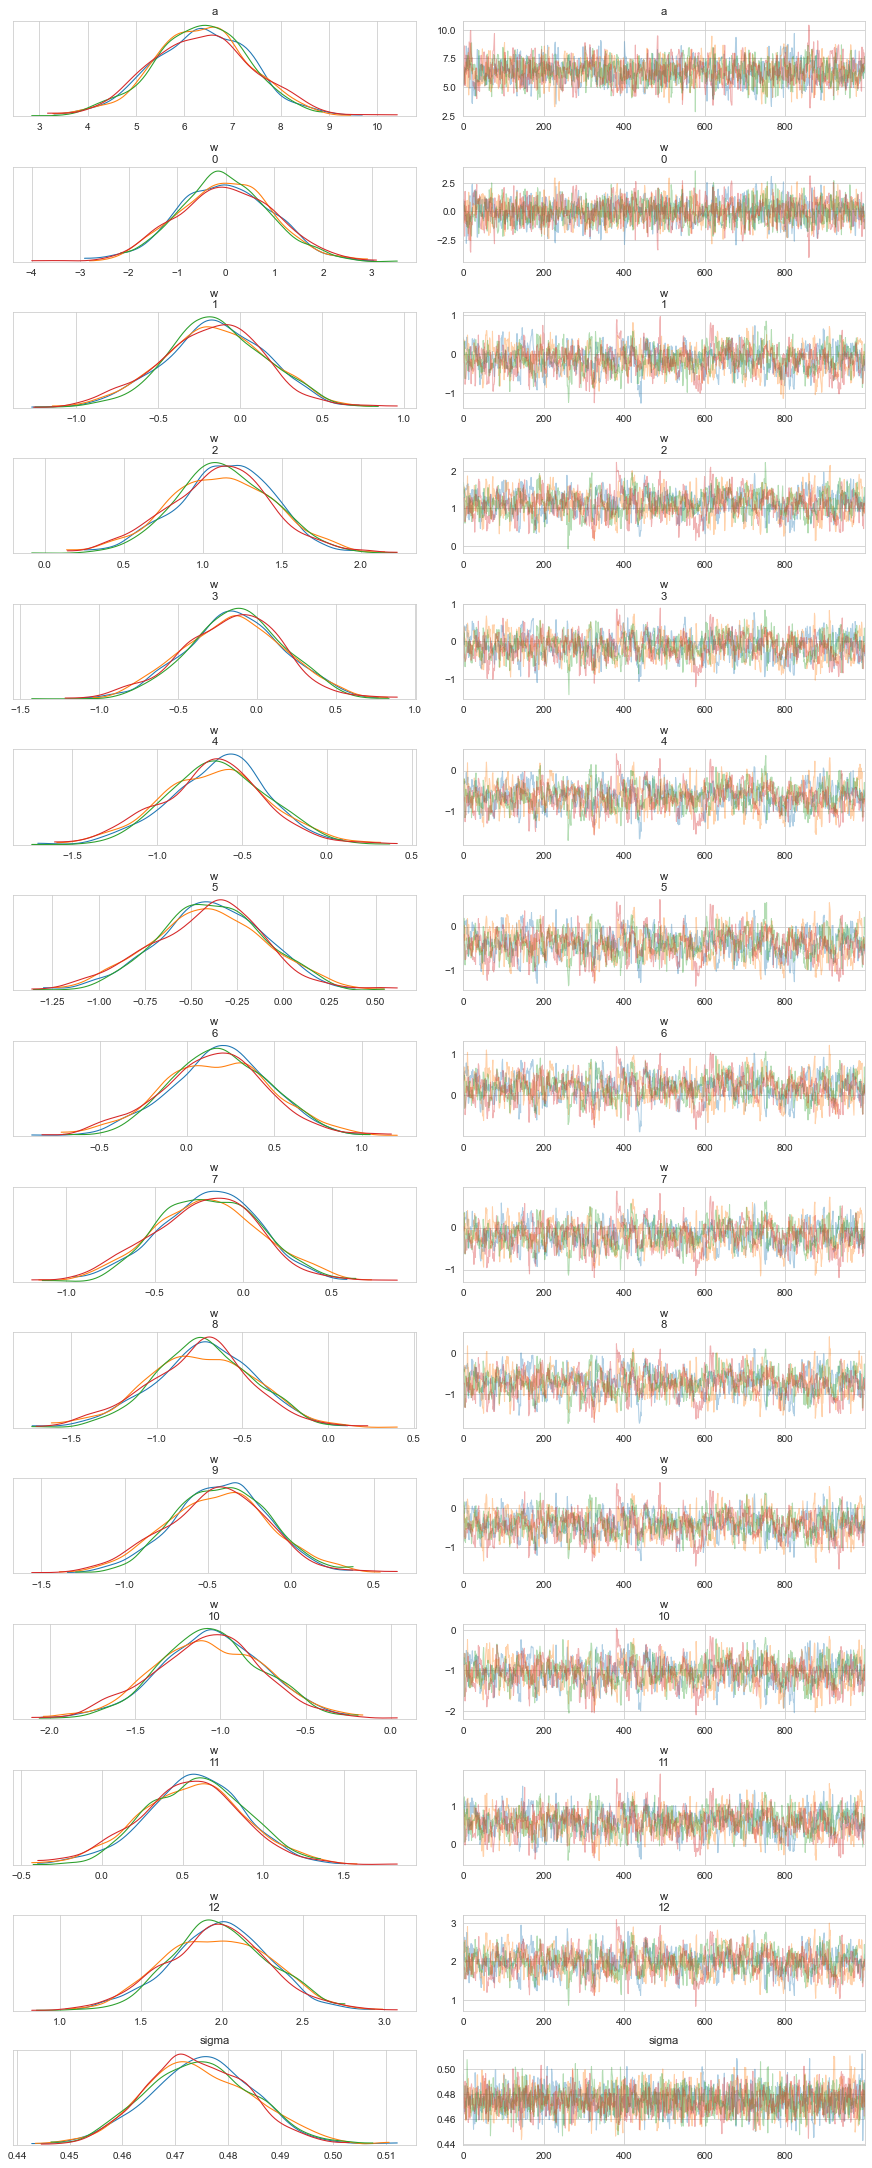

In [553]:
az.plot_trace(tra,var_names='~mu')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15797cb50>,
      dtype=object)

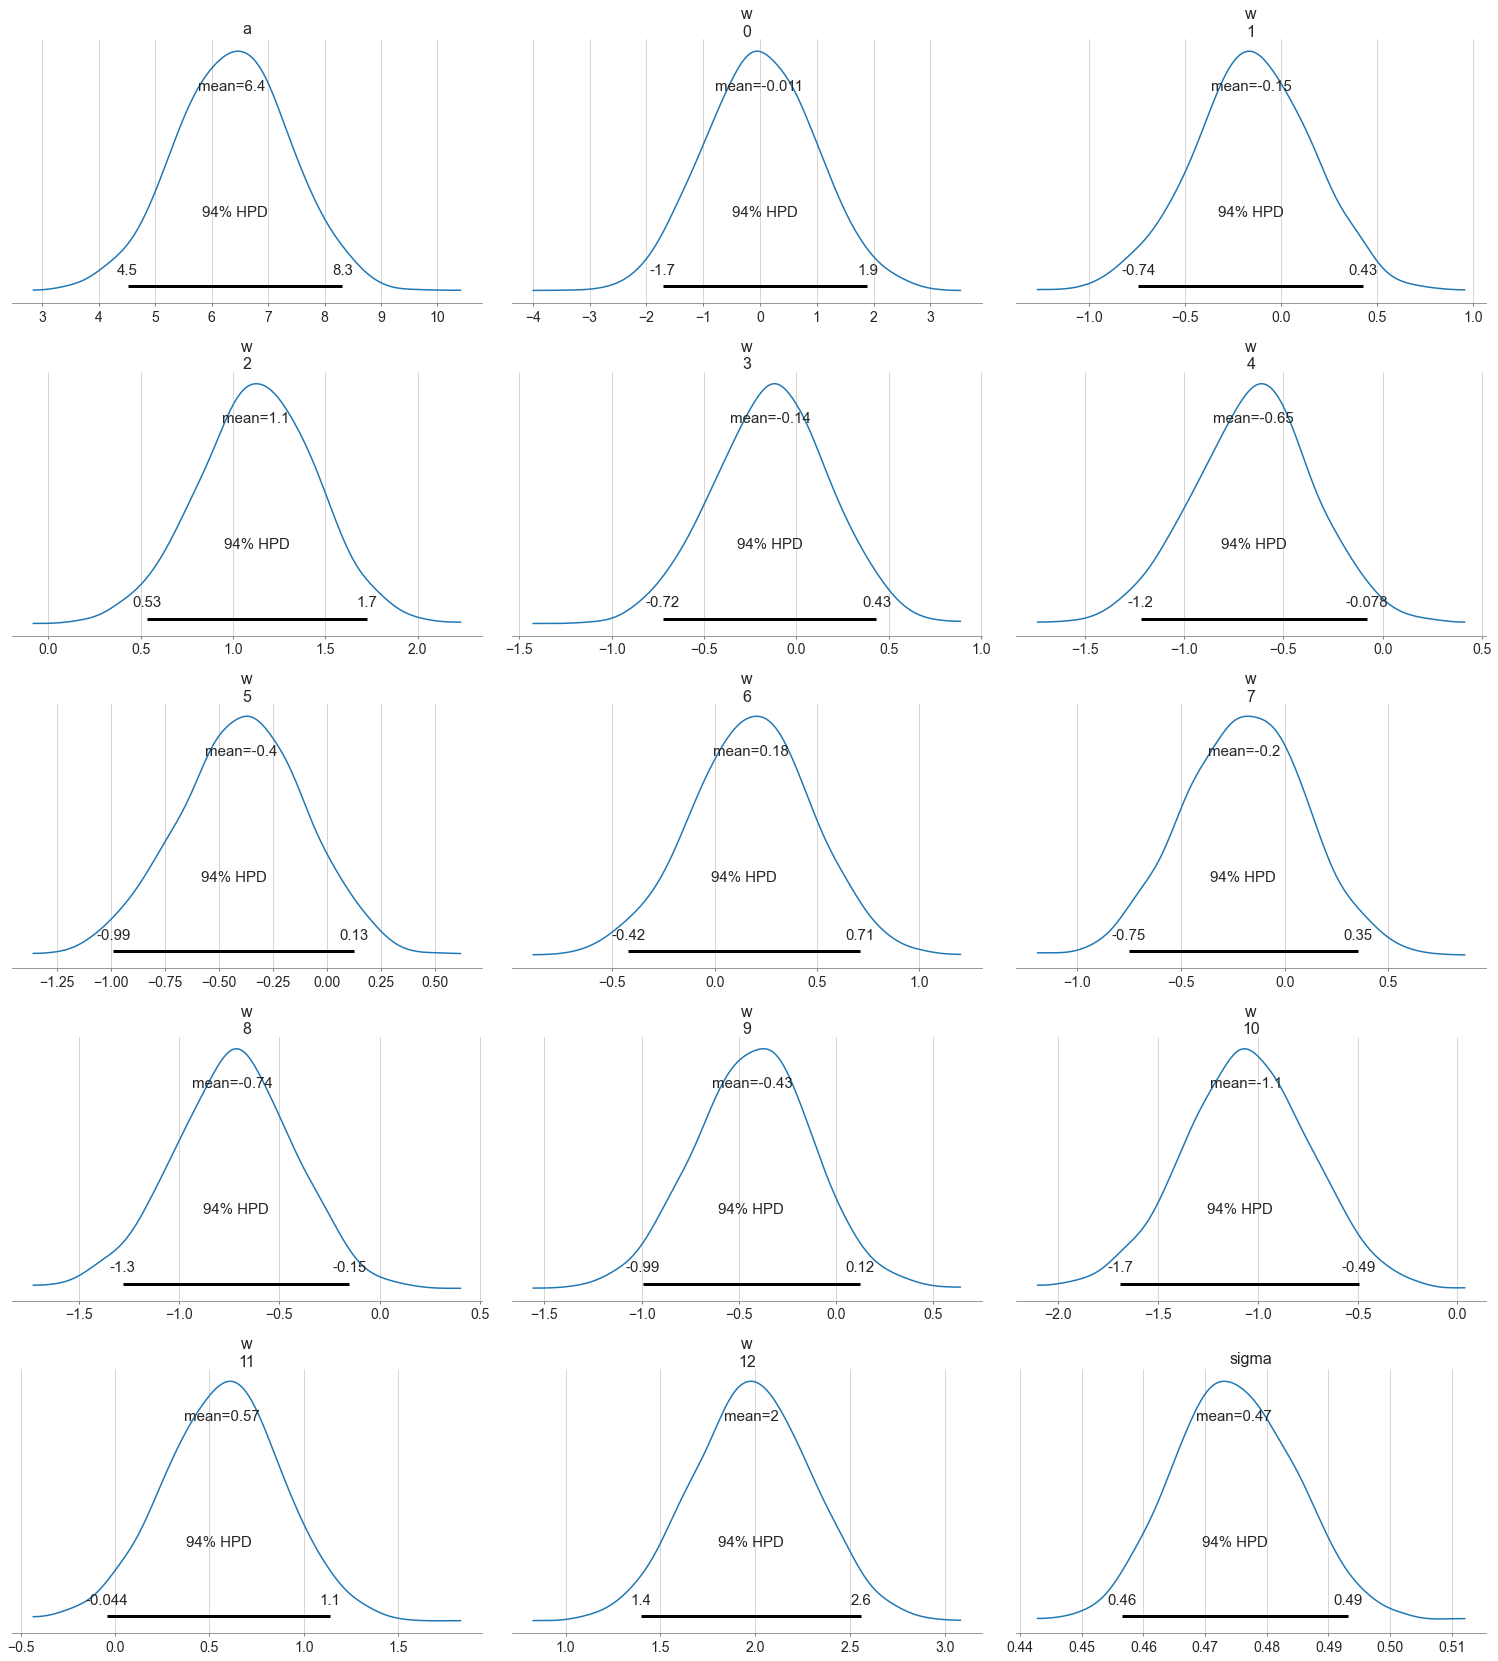

In [554]:
az.plot_posterior(tra,var_names='~mu')

In [557]:
mu_f = pm.trace_to_dataframe(tra).filter(regex=('mu.*'))
mu_f.head()

,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,mu__7,mu__8,mu__9,...,mu__1114,mu__1115,mu__1116,mu__1117,mu__1118,mu__1119,mu__1120,mu__1121,mu__1122,mu__1123
0,6.358760,6.381919,6.404555,6.426670,6.448269,6.469357,6.489937,6.510015,6.529593,6.548678,...,7.895242,7.925672,7.956345,7.987260,8.018419,8.049822,8.081469,8.113362,8.145501,8.177886
1,6.300191,6.323930,6.347145,6.369840,6.392019,6.413687,6.434847,6.455504,6.475663,6.495327,...,8.010964,8.035127,8.059298,8.083475,8.107656,8.131839,8.156022,8.180203,8.204379,8.228548
2,6.071421,6.103092,6.134079,6.164388,6.194025,6.222995,6.251303,6.278955,6.305958,6.332316,...,7.870055,7.897041,7.924151,7.951386,7.978745,8.006226,8.033830,8.061554,8.089400,8.117365
3,6.078925,6.110200,6.140790,6.170702,6.199942,6.228515,6.256427,6.283683,6.310289,6.336251,...,7.882012,7.909422,7.936966,7.964645,7.992456,8.020401,8.048478,8.076686,8.105026,8.133495
4,6.240624,6.261775,6.282492,6.302779,6.322638,6.342073,6.361087,6.379684,6.397866,6.415638,...,8.200469,8.242231,8.284454,8.327141,8.370295,8.413918,8.458013,8.502582,8.547628,8.593154


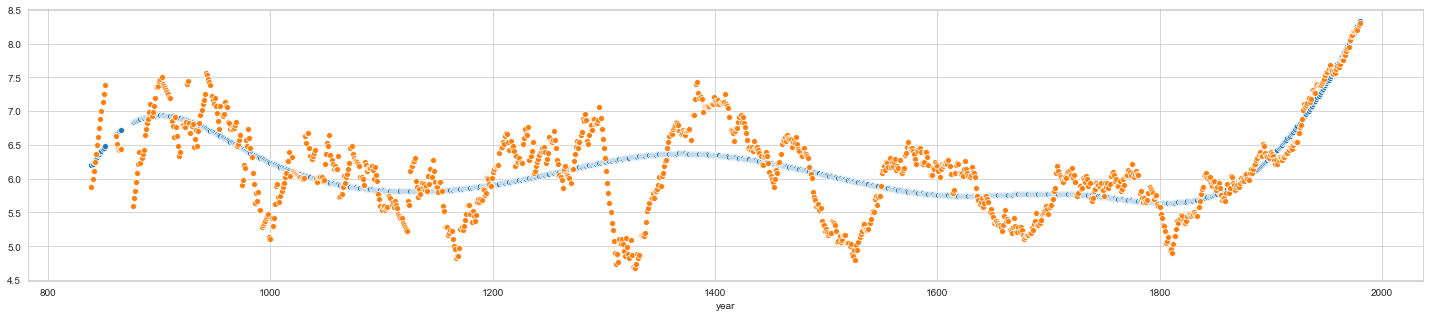

In [558]:
plt.figure(figsize=(25,5))
sns.scatterplot(cherry.year,mu_f.mean().values)
sns.scatterplot(cherry.year,cherry.temp.values)

## Splines in python 

In [511]:
arr = np.arange(0,100)
qt = [1]
tmp = patsy.dmatrix("bs(year, knots=knots, degree=3,include_intercept=True)",
                   data={'year': arr,
                         'knots': np.quantile(arr,[0.5])},return_type='dataframe')

1. total spline : quantiles+1+degree
2. spline at single point : degree+1

In [517]:
tmp.head()

,Intercept,"bs(year, knots=knots, degree=3, include_intercept=True)[0]","bs(year, knots=knots, degree=3, include_intercept=True)[1]","bs(year, knots=knots, degree=3, include_intercept=True)[2]","bs(year, knots=knots, degree=3, include_intercept=True)[3]","bs(year, knots=knots, degree=3, include_intercept=True)[4]"
0,1.0,1.000000,0.000000,0.000000,0.000000,0.0
1,1.0,0.940610,0.058784,0.000604,0.000002,0.0
2,1.0,0.883619,0.113981,0.002383,0.000016,0.0
3,1.0,0.828978,0.165679,0.005287,0.000056,0.0
4,1.0,0.776638,0.213963,0.009267,0.000132,0.0


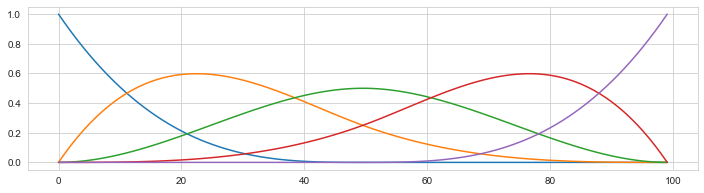

In [513]:
plt.figure(figsize=(12,3))
for i in range(1, tmp.shape[1]):
    plt.plot(arr, tmp[tmp.columns[i]])